<a href="https://colab.research.google.com/github/tranduchaizz/Fruits-and-Vegetable-Recognition/blob/main/Training_fruit_vegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing


##Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetable_Recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetable_Recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 655s 7s/step - accuracy: 0.0288 - loss: 24.4054 - val_accuracy: 0.0285 - val_loss: 3.5823
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.0283 - loss: 3.5807 - val_accuracy: 0.0484 - val_loss: 3.5690
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.0498 - loss: 3.5665 - val_accuracy: 0.0712 - val_loss: 3.5268
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.0446 - loss: 3.5395 - val_accuracy: 0.0627 - val_loss: 3.5138
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.0495 - loss: 3.5176 - val_accuracy: 0.1225 - val_loss: 3.4156
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.0730 - loss: 3.4620 - val_accuracy: 0.1624 - val_loss: 3.2515
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.0898 - loss: 3.4077 - val_accuracy: 0.1681 - val_loss: 3.1790
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.1027 - loss: 3.3526 - val_accuracy: 0.1937 - 

#Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 828ms/step - accuracy: 0.9797 - loss: 0.0852
Training accuracy: 0.9807383418083191


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9473 - loss: 0.3035
Validation accuracy: 0.9515669345855713


#Saving Model

In [ ]:
cnn.save('/content/drive/MyDrive/Fruits_Vegetable_Recognition/trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.0272873193025589,
  0.03210273012518883,
  0.04398074001073837,
  0.050722312182188034,
  0.05971107631921768,
  0.08089887350797653,
  0.09630818665027618,
  0.11075441539287567,
  0.13226324319839478,
  0.17688603699207306,
  0.21861958503723145,
  0.2699839472770691,
  0.31203851103782654,
  0.38715890049934387,
  0.46420544385910034,
  0.5245586037635803,
  0.5605136156082153,
  0.650722324848175,
  0.6908507347106934,
  0.7296950221061707,
  0.745746374130249,
  0.7743178009986877,
  0.7929373979568481,
  0.7903691530227661,
  0.8439807295799255,
  0.8558587431907654,
  0.8715890645980835,
  0.874799370765686,
  0.8866773843765259,
  0.907223105430603,
  0.8937399387359619,
  0.9078651666641235],
 'loss': [8.878846168518066,
  3.5800375938415527,
  3.562945604324341,
  3.528872489929199,
  3.476435899734497,
  3.4153358936309814,
  3.371001958847046,
  3.3017704486846924,
  3.2593424320220947,
  3.093087911605835,
  2.9694836139678955,
  2.7532265186309814,
  2.512

In [ ]:
#Recording History in json
import json
with open('/content/drive/MyDrive/Fruits_Vegetable_Recognition/training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.15669345855713 %


#Accuracy Visualization

##Training Visualization

In [ ]:
training_history.history['accuracy']

[0.0272873193025589,
 0.03210273012518883,
 0.04398074001073837,
 0.050722312182188034,
 0.05971107631921768,
 0.08089887350797653,
 0.09630818665027618,
 0.11075441539287567,
 0.13226324319839478,
 0.17688603699207306,
 0.21861958503723145,
 0.2699839472770691,
 0.31203851103782654,
 0.38715890049934387,
 0.46420544385910034,
 0.5245586037635803,
 0.5605136156082153,
 0.650722324848175,
 0.6908507347106934,
 0.7296950221061707,
 0.745746374130249,
 0.7743178009986877,
 0.7929373979568481,
 0.7903691530227661,
 0.8439807295799255,
 0.8558587431907654,
 0.8715890645980835,
 0.874799370765686,
 0.8866773843765259,
 0.907223105430603,
 0.8937399387359619,
 0.9078651666641235]

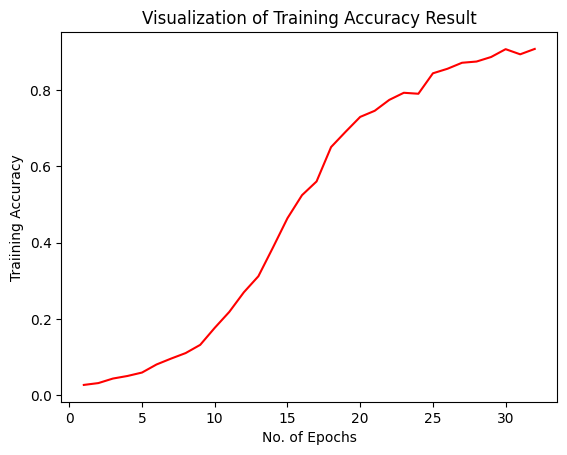

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

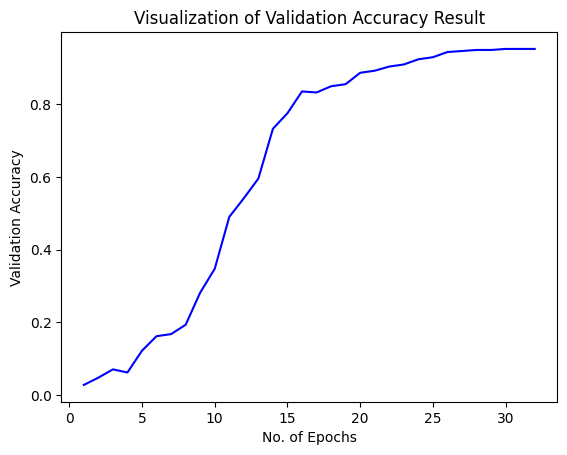

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetable_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 67s 6s/step - accuracy: 0.9456 - loss: 0.2366
Test accuracy: 0.9526462554931641
